<a href="https://colab.research.google.com/github/Deciptikon/GoogleColabEasyGeneticAlgorithm/blob/main/Python_Genetic_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импортируем основные библиотеки для вычислений

In [209]:
import time 
import math
import random
import numpy as np

Импортируем библиотеки для построения графиков

In [210]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.animation
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

%matplotlib inline

# Класс с данными задачи: ограничения, зависимости, ...

In [211]:
class Data():

  # константы и ограничения
  A = 0.13044055
  B = 0.68203740
  C = 0.20000000

  MIN_S = 0.00017
  MAX_S = 0.00063

  MIN_N = 1000
  MAX_N = 2000

  MIN_V = 800
  MAX_V = 1800

  # желаемая волнистость
  W_OPT = 110

  # максимальные величины мутаций параметров s и n
  VALUE_MUTATION_S = 0.00001
  VALUE_MUTATION_N = 10

  def __init__(self, s, n) -> None:
    #print("Инициализация...")
    self.set_s(s)
    self.set_n(n)
    #print(" ")

  def get_s(self) -> float:
    return self._s

  def set_s(self, s):
    if s < self.MIN_S:
      self._s = self.MIN_S
      #print("Переменная \"s\" меньше минимального значения и была скорректированна")
    elif s > self.MAX_S:
      self._s = self.MAX_S
      #print("Переменная \"s\" больше максимального значения и была скорректированна")
    else : 
      self._s = s
      #print("Переменная \"s\" имеет корректное значение")

  def get_n(self) -> float:
    return self._n

  def set_n(self, n):
    if n < self.MIN_N:
      self._n = self.MIN_N
      #print("Переменная \"n\" меньше минимального значения и была скорректированна")
    elif n > self.MAX_N:
      self._n = self.MAX_N
      #print("Переменная \"n\" больше максимального значения и была скорректированна")
    else : 
      self._n = n
      #print("Переменная \"n\" имеет корректное значение")

  def calculate_adapt(self) -> None:# формула вычисления приспособленности
    ada = self.cost()
    v = self.v(self._s, self._n)
    if v > self.MAX_V:
      ada += pow(v - self.MAX_V, 2)
    elif v < self.MIN_V:
      ada += pow(self.MIN_V - v, 2)
    self._adapt = ada
  
  def adapt(self) -> float:
    return self._adapt

  def v(self) -> float:# формула вычисления V(s,n) полученная аналитически
    return (self._n / self.C - self.W_OPT * math.sin( self.B / (self._s * self._n) ) / (self.A * self.C)) * self._s * self._n

  @staticmethod
  def v( s, n) -> float:# формула вычисления V(s,n) полученная аналитически
    return ( n / Data.C - Data.W_OPT * math.sin( Data.B / ( s * n) ) / (Data.A * Data.C)) * s * n

  def W(self) -> float:# формула вычисления волнистости по текущим параметрам
    return self.A * (self._n - self.C* (self.v(self._s, self._n) / (self._s * self._n)) )/math.sin(self.B / (self._s*self._n))

  def cost(self) -> float:# формула вычисления затрат на электроэнергию
    return self.v(self._s, self._n)/100.0 + 23.63/(self._s*self._n)

  def print(self) -> None:
    #print("Параметры текущей особи:")
    print("# s ="   , self.get_s())
    print("# n ="   , self.get_n())
    print("# v ="   , self.v(self._s, self._n)   )
    print("# W ="   , self.W()    )
    print("# Cost =", self.cost() ) 
    print(" ")

# Рисуем основные графики

Метод получения данных для графика, с отсечением по максимуму и минимуму

In [212]:
def get_data_v(steps_S=100, steps_N=100):
  S=[]
  N=[]
  V=[]

  h_S = (Data.MAX_S - Data.MIN_S)/(steps_S - 1)
  h_N = (Data.MAX_N - Data.MIN_N)/(steps_N - 1)

  for i in range(steps_S):
    for j in range(steps_N):
      current_s = Data.MIN_S + i * h_S
      current_n = Data.MIN_N + j * h_N
      current_v = Data.v(current_s, current_n)
      if current_v > Data.MIN_V and current_v < Data.MAX_V:
        V.append(current_v)
        S.append(current_s)
        N.append(current_n)

  S = np.array(S)
  N = np.array(N)
  V = np.array(V)

  return S, N, V

Метод создания графика заданного размера и с заданными углами ориентации вида

In [213]:
def create_graph(width_graph_cm=12, height_graph_cm=10, angle_horizontal=0, angle_vertical=45, steps_S=100, steps_N=100):
  fig_V = plt.figure(figsize=(width_graph_cm, height_graph_cm))
  ax = fig_V.gca(projection='3d')
  S, N, V = get_data_v(steps_S, steps_N)

  surf_V = ax.scatter(S, N, V, cmap=cm.coolwarm,
                       linewidth=1, antialiased=True)

  ax.set_ylim(Data.MIN_N, Data.MAX_N)
  ax.set_xlim(Data.MIN_S, Data.MAX_S)
  ax.set_zlim(Data.MIN_V, Data.MAX_V)

  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')

  ax.xaxis.set_major_locator(LinearLocator(10))
  #ax.xaxis.set_major_formatter(FormatStrFormatter('%f'))
  ax.yaxis.set_major_locator(LinearLocator(10))
  #ax.yaxis.set_major_formatter(FormatStrFormatter('%.00001f'))
  ax.zaxis.set_major_locator(LinearLocator(10))
  #ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

  ax.view_init(angle_vertical, angle_horizontal)
  plt.show()


Вид спереди (горизонтальный угол = 0, вертикальный = 0)

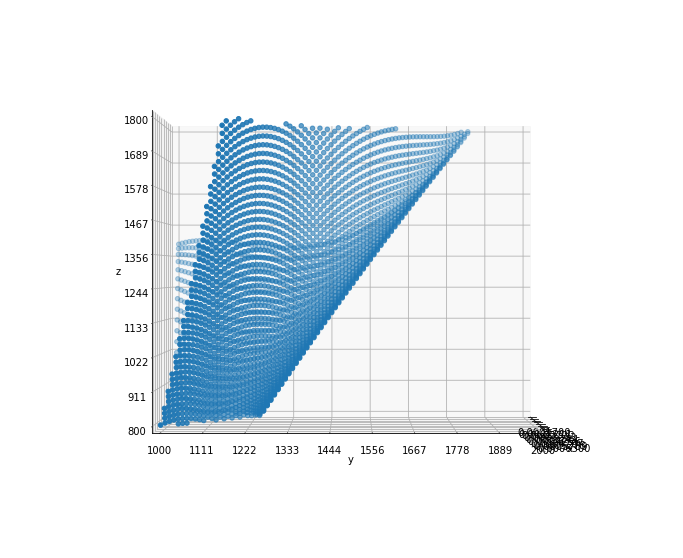

In [214]:
create_graph(angle_horizontal=0, angle_vertical=0)

Вид справа (горизонтальный угол = -90, вертикальный = 0)

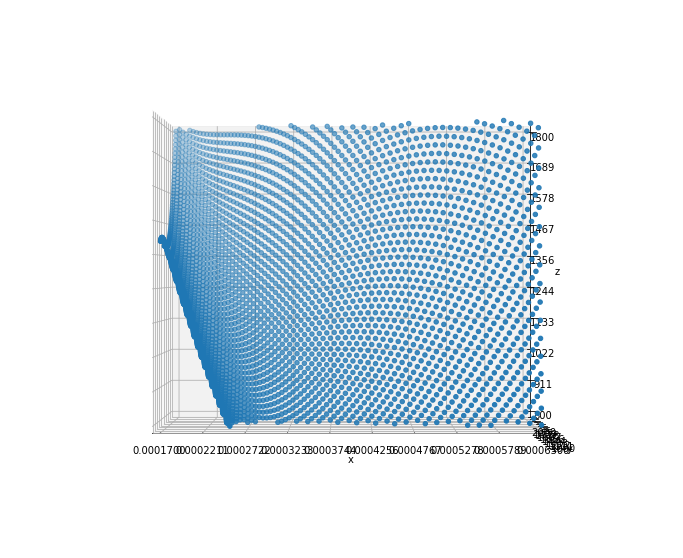

In [215]:
create_graph(angle_horizontal=-90, angle_vertical=0)

Вид сверху (горизонтальный угол = -90, вертикальный = -90)

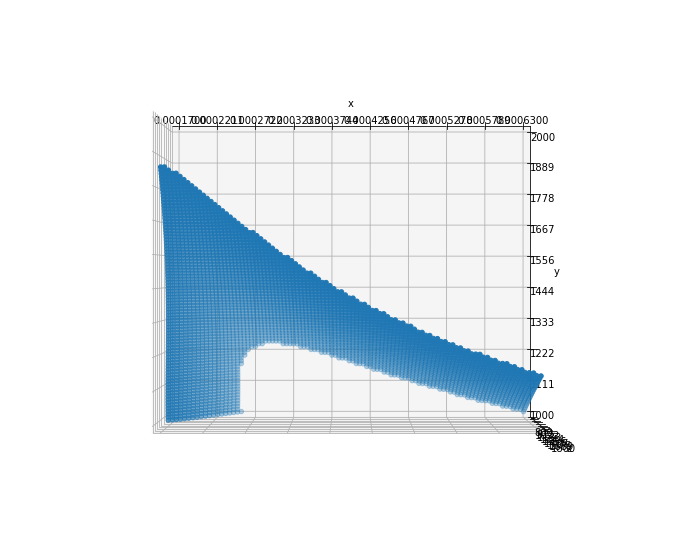

In [216]:
create_graph(angle_horizontal=-90, angle_vertical=90)

Изометрия (горизонтальный угол = -45, вертикальный = 45)

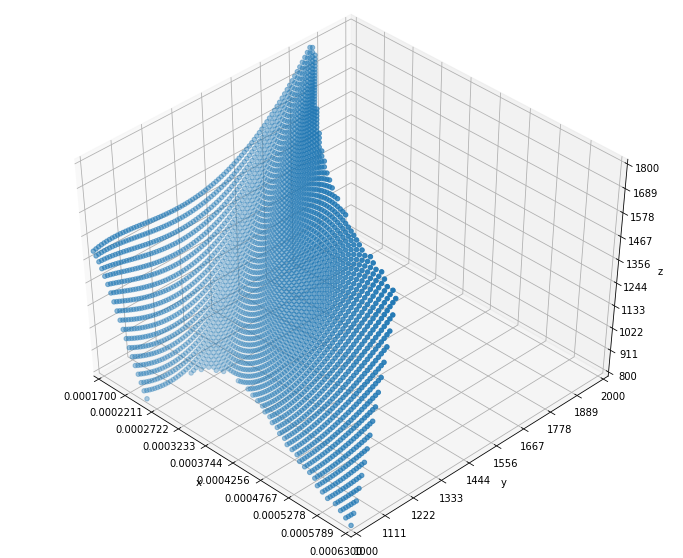

In [217]:
create_graph(angle_horizontal=-45, angle_vertical=45)

# Класс с генетическим алгоритмом

In [218]:
class GenAlg():
  _max_epoha            = 10     # Максимальное количество эпох
  _balance_crossover    = 0.5    # Баланс скрещивания
  _probability_mutation = 0.5    # Вероятность мутации
  _size_population      = 10     # Размер популяции
  _population           = list() # Сама популяция
  _graph                = list() # Динамика оптимизации (для отображения на графике) 
  _sec_wait             = 0.3    # Время задержки вычислений

  def __init__(self, max_epoha, size_population) -> None:
    print("Инициализация генетического алгоритма==============")
    self.set_max_epoha(max_epoha)
    self.set_size_population(size_population)
    print("===================================================")
    print(" ")

  # основной цикл генетического алгоритма
  def run(self) -> None:
    self._generate_population()
    for epoha in range(self._max_epoha): 
      self._crossingover()
      self._mutation()
      self._adaptation()
      self._selection()
      f = self._population[0] # лучшая особь на каждом этапе
      self._graph.append(f.adapt()) # сохраняем приспособленность лучшей особи 
      # выводим информацию на экран
      print("Epoha", epoha)
      print("Размер популяции", len(self._population))
      print("Лучшая особь с приспособленностью: ", f.adapt())
      f.print()
      print("----------------------------------------")
      print(" ")
      time.sleep(self._sec_wait)
  
  # начальная популяция
  def _generate_population(self) -> None:
    print("generate_population")
    for i in range(self._size_population):
      ss = random.random() * (Data.MAX_S - Data.MIN_S) + Data.MIN_S
      nn = random.random() * (Data.MAX_N - Data.MIN_N) + Data.MIN_N
      self._population.append(Data(ss, nn))
    print("Размер популяции", len(self._population))

  # скрещивание
  def _crossingover(self) -> None:
    #print("crossingover")
    if len(self._population) < 2:
      return
    cross_pop = list()
    for a in self._population:
      random_index = random.randint(0, len(self._population) - 1)
      b = self._population[random_index]
      cross_s = a.get_s()*self._balance_crossover + b.get_s()*(1 - self._balance_crossover)
      cross_n = a.get_n()*self._balance_crossover + b.get_n()*(1 - self._balance_crossover)
      c = Data(cross_s, cross_n)
      cross_pop.append(c)
    if len(cross_pop) < 2:
      return
    self._population.extend(cross_pop)

  # мутации
  def _mutation(self) -> None:
    #print("mutation")
    if len(self._population) < 2:
      return
    mut_pop = list()
    for p in self._population:
      mut_s = p.get_s()
      mut_n = p.get_n()
      if random.random() < self._probability_mutation:
        mut_s += (2.0*random.random() - 1.0)*Data.VALUE_MUTATION_S
      if random.random() < self._probability_mutation:
        mut_n += (2.0*random.random() - 1.0)*Data.VALUE_MUTATION_N
      q = Data(mut_s, mut_n)
      mut_pop.append(q)
    if len(mut_pop) == 0:
      return
    self._population.extend(mut_pop)

  # вычисление приспособленности
  def _adaptation(self) -> None:
    #print("adaptation")
    for p in self._population:
      p.calculate_adapt()

  # отбор
  def _selection(self) -> None:
    #print("selection")
    def custom_sort(data) -> float:
      return data.adapt()
    self._population.sort(key=custom_sort)
    self._population = self._population[:self._size_population]

  def set_max_epoha(self, max_epoha = 10) -> None:
    if max_epoha <= 0:
      print("Ошибка: количество эпох должно быть больше нуля!", max_epoha, "не больше 0")
      print(" ")
      return
    self._max_epoha = max_epoha
    print("Установлено новое значение количества эпох: max_epoha =", self._max_epoha)
    print(" ")

  def get_max_epoha(self) -> float:
    return self._max_epoha

  def set_size_population(self, size = 10) -> None:
    if size < 2:
      print("Ошибка: размер популяции должен быть больше одного!", size, "не больше 1")
      print(" ")
      return
    self._size_population = size
    print("Установлено новый размер популяции: size_population =", self._size_population)
    print(" ")

  def get_size_population(self) -> float:
    return self._size_population
  
  def set_balance_crossover(self, balance_crossover = 0.5) -> None:
    if balance_crossover < 0 or balance_crossover > 1:
      print("Ошибка: баланс скрещивания должен быть на интервале от 0 до 1!", balance_crossover, " за пределами интервала [0, 1]")
      print(" ")
      return
    self._balance_crossover = balance_crossover
    print("Установлен новый баланс скрещивания: balance_crossover =", self._balance_crossover)
    print(" ")

  def get_balance_crossover(self) -> float:
    return self._balance_crossover

  def set_probability_mutation(self, probability_mutation = 0.5) -> None:
    if probability_mutation < 0 or probability_mutation > 1:
      print("Ошибка: вероятность мутации должна быть на интервале от 0 до 1!", probability_mutation, " за пределами интервала [0, 1]")
      print(" ")
      return
    self._probability_mutation = probability_mutation
    print("Установлена новая вероятность мутации: probability_mutation =", self._probability_mutation)
    print(" ")

  def get_probability_mutation(self) -> float:
    return self._probability_mutation

  def get_graph(self):
    return self._graph.copy()

# Инициализируем и запускаем генетический алгоритм

Инициализация генетического алгоритма==============
Установлено новое значение количества эпох: max_epoha = 100
 
Установлено новый размер популяции: size_population = 30
 
 
generate_population
Размер популяции 30
Epoha 0
Размер популяции 30
Лучшая особь с приспособленностью:  53.029403307195324
# s = 0.0004758528955179997
# n = 1180.727868156338
# v = 1097.212236735249
# W = 110.00000000000001
# Cost = 53.029403307195324
 
----------------------------------------
 
Epoha 1
Размер популяции 30
Лучшая особь с приспособленностью:  51.418869352251924
# s = 0.0004975362473352555
# n = 1103.1016505501623
# v = 836.3882490590947
# W = 110.00000000000001
# Cost = 51.418869352251924
 
----------------------------------------
 
Epoha 2
Размер популяции 30
Лучшая особь с приспособленностью:  51.418869352251924
# s = 0.0004975362473352555
# n = 1103.1016505501623
# v = 836.3882490590947
# W = 110.00000000000001
# Cost = 51.418869352251924
 
----------------------------------------
 
Epoha 3
Разм

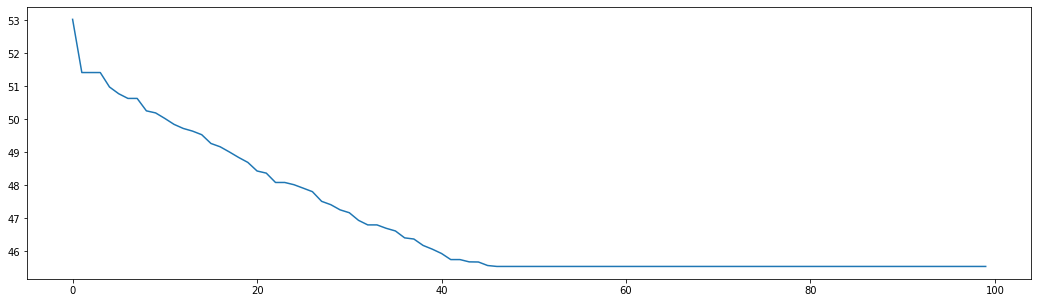

In [219]:
# количество эпох = 100
# количество особей = 30
ga = GenAlg(100, 30)

ga.run()# запуск ГА

# готовим данные для графика и рисуем
y = ga.get_graph() # откладываем по оси Y приспособленность особи
x = [i for i in range(len(y))] # по оси X - эпохи по порядку 

plt.figure(figsize=(18, 5)) # размер графика 18см х 5см

plt.plot(x,y)